<a href="https://colab.research.google.com/github/SheriffDeen002/Master-Sheriff/blob/master/Deep%20Learning%20Workshop_4_UnderstandingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving life_expectancy2015_data.csv to life_expectancy2015_data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
life = pd.read_csv('life_expectancy2015_data.csv')
pd

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

In [4]:
life.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
5,Argentina,2015,Developing,76.3,116.0,8,13467.123600,High
6,Armenia,2015,Developing,74.8,118.0,1,369.654776,Medium
7,Australia,2015,Developed,82.8,59.0,1,56554.387600,High
8,Austria,2015,Developed,81.5,65.0,0,43665.947000,High
9,Azerbaijan,2015,Developing,72.7,118.0,5,55.313820,Medium


In [6]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life[feature_names]
#extract output to be called y
y = life["Life expectancy"]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)

In [22]:
#import the MinMaxScaler class from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)



MinMaxScaler()

In [52]:
scale = MinMaxScaler()
scale.fit(x)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [43]:
model = Sequential()


In [44]:

model.add(Dense(units = 64, input_dim = 3, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units= 62, activation= 'relu'))

In [45]:
model.add(Dense(units = 1, activation = "linear"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 62)             │         4,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,509 (33.24 KB)

 Trainable params: 8,509 (33.24 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

In [50]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
patience = 20)

In [53]:
history = model.fit(x = x_train_scaled, y = y_train,
batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1,
callbacks = [early_stopping])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5215.0742 - mean_squared_error: 5215.0742 - val_loss: 5191.5410 - val_mean_squared_error: 5191.5410
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5263.9561 - mean_squared_error: 5263.9561 - val_loss: 5173.8125 - val_mean_squared_error: 5173.8125
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5172.0044 - mean_squared_error: 5172.0044 - val_loss: 5150.8345 - val_mean_squared_error: 5150.8345
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5144.2393 - mean_squared_error: 5144.2393 - val_loss: 5119.8228 - val_mean_squared_error: 5119.8228
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5115.3984 - mean_squared_error: 5115.3984 - val_loss: 5077.5845 - val_mean_squared_error: 5077.5845
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 5044.7734 - mean_squared_error: 5044.7734 - val_loss: 5019.3569 - val_mean_squared_error: 5019.3569
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


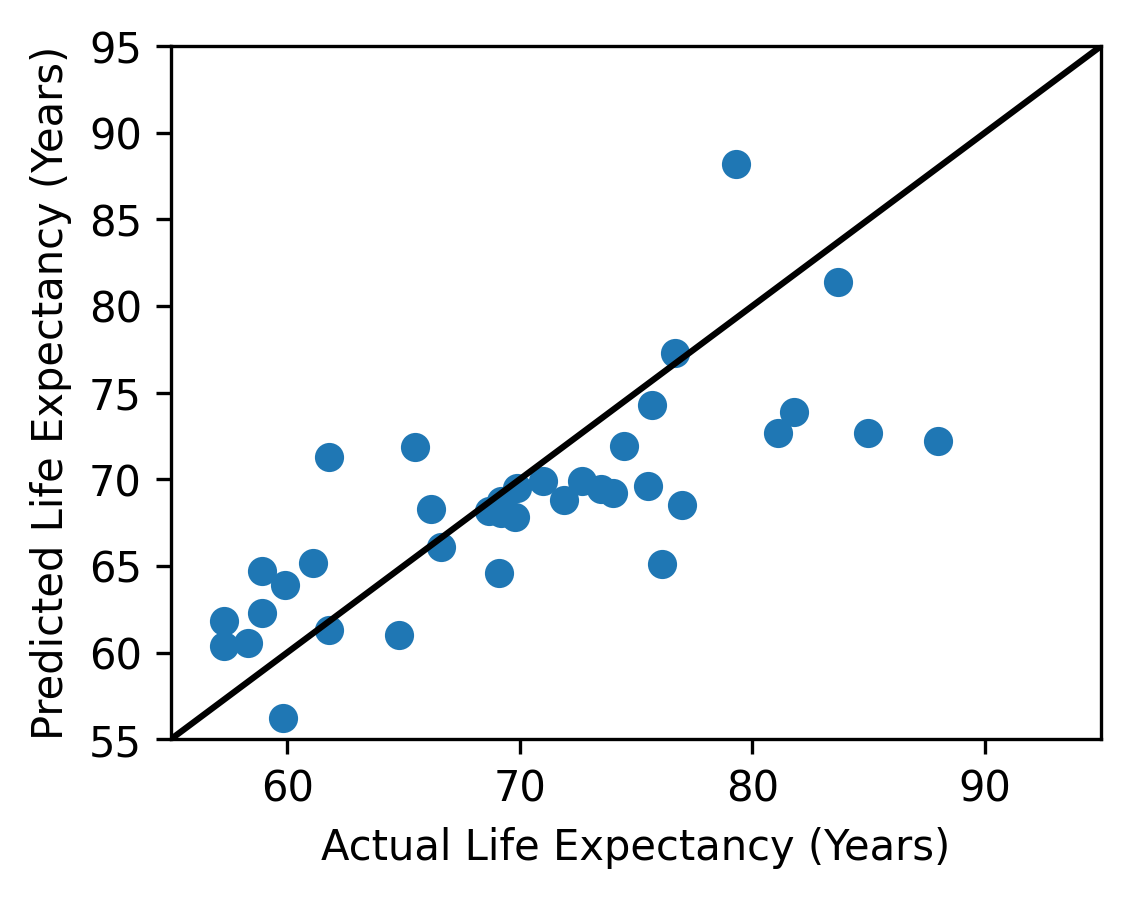

In [56]:
y_pred = model.predict(x_test_scaled)
plt.figure(figsize = (4, 3), dpi= 300)

plt.scatter(y_test, y_pred)

plt.plot([55, 95], [55, 95], 'k-')

#label both axes.
plt.xlabel('Actual Life Expectancy (Years)')
plt.ylabel('Predicted Life Expectancy (Years)')
#limit the range of values on both axes
plt.xlim([55, 95])
plt.ylim([55, 95])
#Show the plot.
plt.show()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
history_df = pd.DataFrame(history.history)

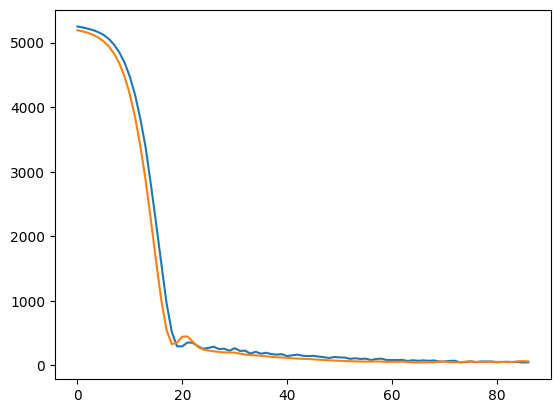

In [58]:
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

In [66]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x_numerical = life[feature_names]
#Scale the numerical featuresusing the min max as before
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)
x_cat = life["Status"]
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(x_cat)
x_cat_label = label.transform(x_cat)


In [64]:
print(life.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'GDP', 'Life expectancy class'],
      dtype='object')


In [68]:
x_cat_label = x_cat_label.reshape(-1, 1)